# Analisis para los procesos que generan b b~, pero no pasan por Z 

In [1]:
# Librerias necesarias
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist
import mplhep as hep
import pandas as pd
import glob
import coffea

plt.style.use([hep.style.ROOT])

import warnings
warnings.filterwarnings('ignore')

In [2]:
runs = ["run_0{}".format(x+1) if x < 9 else "run_{}".format(x+1) for x in range(20) ]
fname = ["/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/{}/tag_1_delphes_events.root".format(run) for run in runs ]
fname

['/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_01/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_02/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_03/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_04/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_05/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_06/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_07/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_08/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_09/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_10/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_11/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_12/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/NonZbbbar/Events/run_13/tag_1_delphes_events.root',

In [3]:
dc =  {"jet_pt0":[],"jet_pt1":[],"jet_pt2":[],"jet_pt3":[],
       "jet_eta0":[],"jet_eta1":[],"jet_eta2":[],"jet_eta3":[],
       "jet_phi0":[],"jet_phi1":[],"jet_phi2":[],"jet_phi3":[],
       'jet_btag0':[], 'jet_btag1':[], 'jet_btag2':[], 'jet_btag3':[],
       'jet_mass0':[], 'jet_mass1':[], 'jet_mass2':[], 'jet_mass3':[],
       'missinget_met':[],'missinget_phi':[]}
df_all = pd.DataFrame(dc)
df_all.head()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_mass0,jet_mass1,jet_mass2,jet_mass3,missinget_met,missinget_phi


In [4]:
for index,path in enumerate(fname):
    tree_temp = Converter(path)
    events_temp = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"], "MissingET": ["MET", "Phi"]}
    tree_temp.generate(events_temp)
    df_temp = tree_temp.df
    print(index+1,"- Tamaño del dataframe temporal:",len(df_temp))
    df_all = pd.concat([df_all,df_temp], ignore_index=True)
print("Tamaño del dataframe total es:",len(df_all))

1 - Tamaño del dataframe temporal: 50000
2 - Tamaño del dataframe temporal: 50000
3 - Tamaño del dataframe temporal: 50000
4 - Tamaño del dataframe temporal: 50000
5 - Tamaño del dataframe temporal: 50000
6 - Tamaño del dataframe temporal: 50000
7 - Tamaño del dataframe temporal: 50000
8 - Tamaño del dataframe temporal: 50000
9 - Tamaño del dataframe temporal: 50000
10 - Tamaño del dataframe temporal: 50000
11 - Tamaño del dataframe temporal: 50000
12 - Tamaño del dataframe temporal: 50000
13 - Tamaño del dataframe temporal: 50000
14 - Tamaño del dataframe temporal: 50000
15 - Tamaño del dataframe temporal: 50000
16 - Tamaño del dataframe temporal: 50000
17 - Tamaño del dataframe temporal: 50000
18 - Tamaño del dataframe temporal: 50000
19 - Tamaño del dataframe temporal: 50000
20 - Tamaño del dataframe temporal: 50000
Tamaño del dataframe total es: 1000000


In [5]:
df_all.head()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_mass0,jet_mass1,jet_mass2,jet_mass3,missinget_met,missinget_phi
0,29.054260,12.742677,8.638737,8.162245,-0.519877,0.950775,-0.306662,-2.135504,1.238970,-1.737301,...,1.0,0.0,0.0,0.0,3.875595,2.301512,1.299281,9.086105e-01,10.722972,-1.843623
1,58.754505,50.763744,27.207157,7.272702,2.664346,3.129741,-3.245428,-0.236041,1.700463,-0.990565,...,0.0,0.0,0.0,0.0,6.524277,5.718751,5.695341,-1.192093e-07,6.524762,-2.984508
2,53.199581,34.409039,16.918135,15.760535,-0.244963,-0.976277,2.145254,-0.029278,-1.935551,1.100978,...,0.0,1.0,0.0,0.0,6.911521,7.122169,3.952582,3.030602e+00,7.836720,1.943958
3,52.860683,44.242615,14.086333,8.292124,0.442511,-0.382299,-0.248995,0.452810,-1.992263,1.378018,...,1.0,1.0,0.0,1.0,9.429096,5.101544,2.903848,1.344667e+00,24.745420,1.655889
4,36.721161,21.234055,10.742517,10.350548,-0.667921,-1.302323,2.745954,-1.192337,-2.962479,0.711884,...,1.0,1.0,0.0,0.0,5.551464,3.934533,1.689655,2.389796e+00,15.966218,0.224128


In [6]:
df_all.shape

(1000000, 22)

In [7]:
# formulas para Delta phi, Abs Delta phi y DeltaR
def DeltaPhi(i,row, col1, col2):
    """
    correction on azimuthal angle difference dphi
    """
    dphi = (row[col1] - row[col2])[i]
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi(i,rowa, col1a, col2a = 'met_Phi'):
    return np.abs(DeltaPhi(i,rowa, col1a, col2a))

def DeltaR(Deta,Dphi):
    return np.sqrt( Deta**2 + Dphi**2 )

def pt_jet(data,feature,min_range,max_range, bin):
    '''
    Realiza un grafico de cada objeto.
    '''
    
    #fig = plt.figure(figsize=(6,4))
    box_style=dict(boxstyle='square', alpha=0.5)
    text = "n_events: {}".format(data[feature].count())+"\n" \
            +"mean: {}".format(np.round(data[feature].mean(),2))+"\n" \
            +"std: {}".format(np.round(data[feature].std(),2))
    plt.hist(data[feature],bins=bin)
    
    ax = plt.gca()
    p = ax.patches  
    heights = [patch.get_height() for patch in p]
    if feature[:6] == "Delta_": num = 3
    else: num = 1.8
    
    plt.title("Histograma del objeto: {}".format(feature),size=15)
    #plt.xlabel("pT [GeV]",size=10)
    plt.ylabel("Eventos",size=10)
    plt.text(max_range/num,max(heights)/1.3, text,bbox=box_style,size=12)
    plt.xlim(min_range,max_range)

## Hitogramas de pT

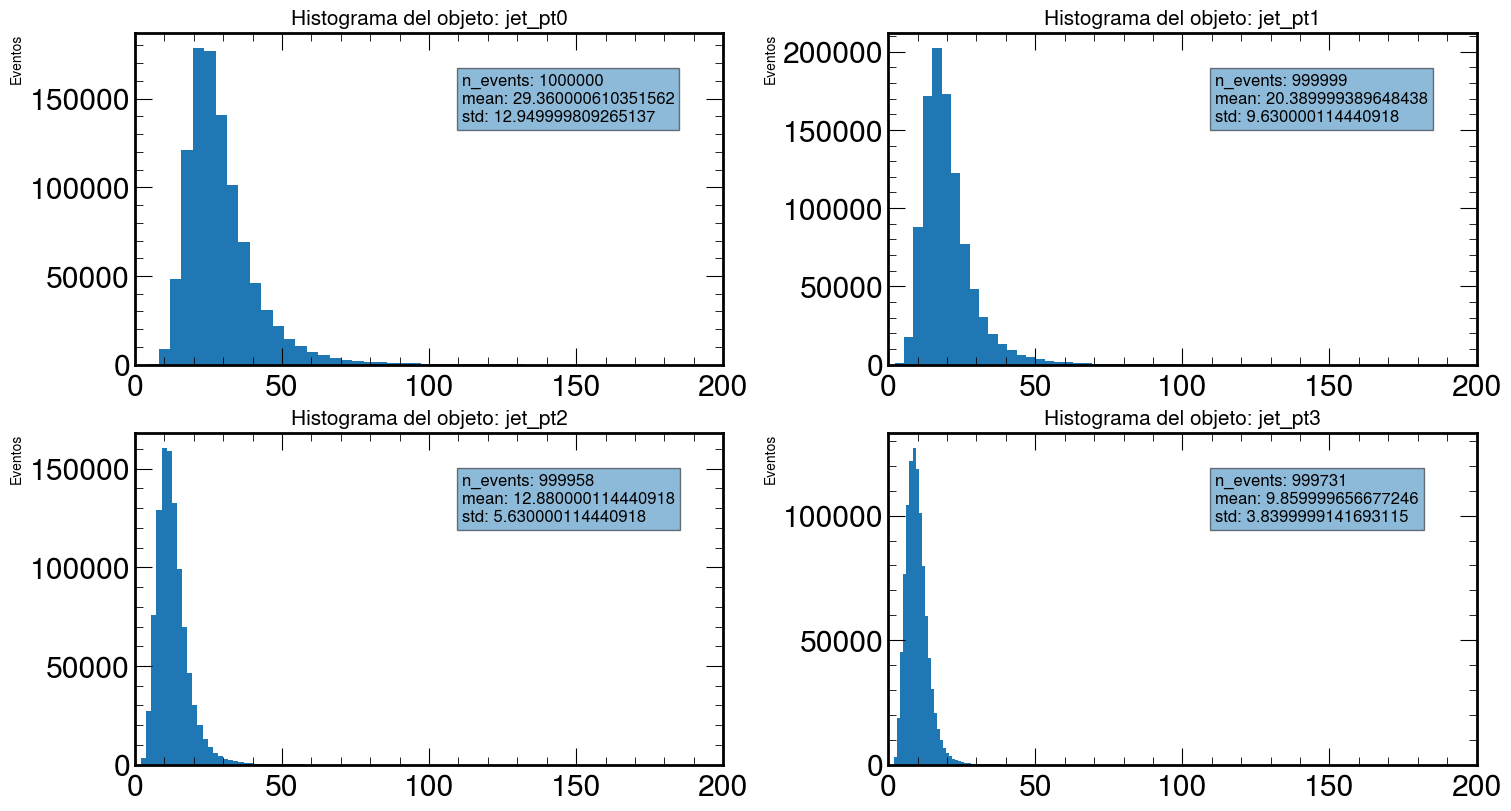

In [8]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(df_all,"jet_pt0",0,200,100)
plt.subplot(2,2,2)
pt_jet(df_all,"jet_pt1",0,200,100)
plt.subplot(2,2,3)
pt_jet(df_all,"jet_pt2",0,200,100)
plt.subplot(2,2,4)
pt_jet(df_all,"jet_pt3",0,200,100)

## Hitogramas de $\eta$

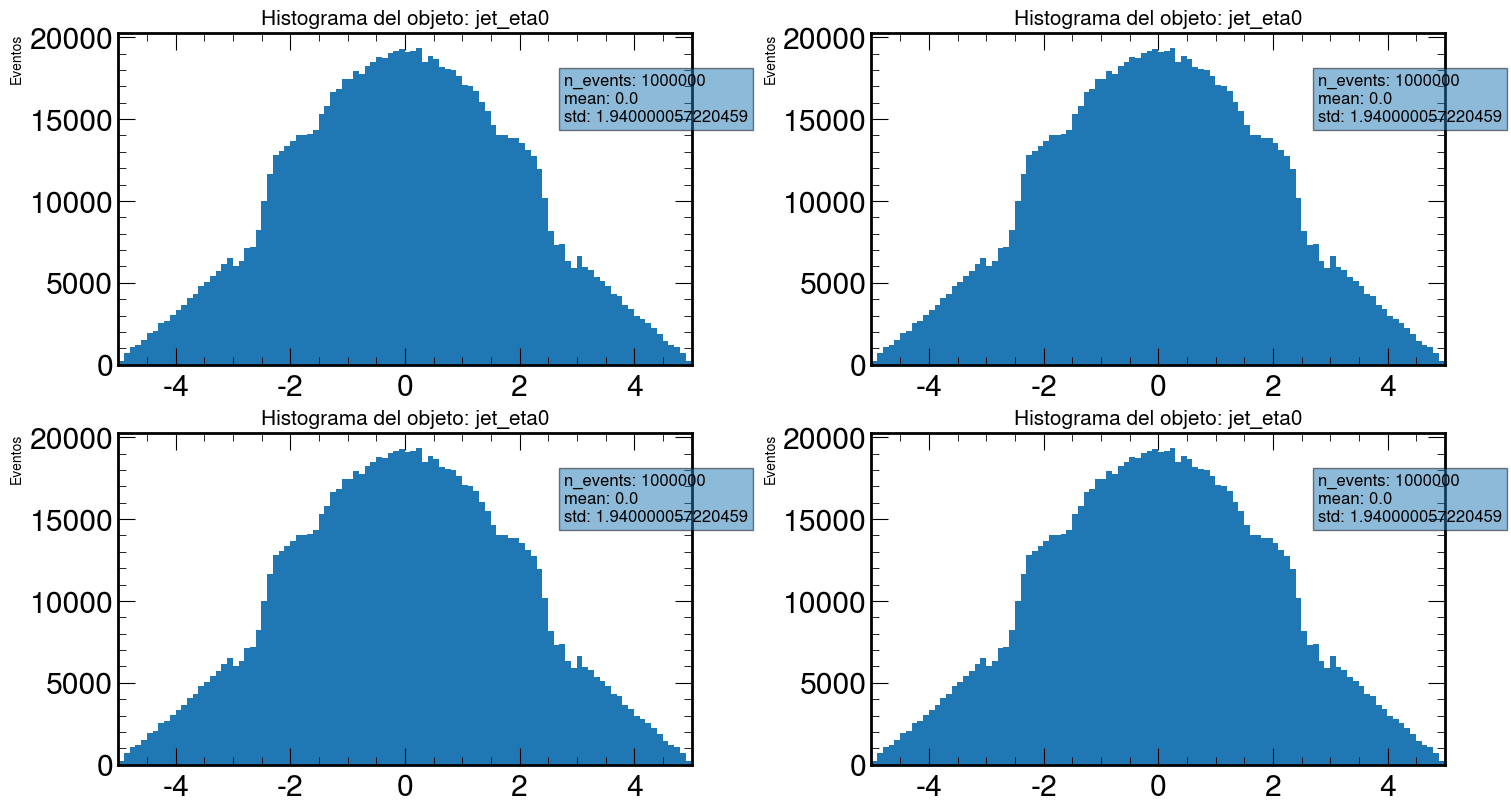

In [9]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(df_all,'jet_eta0',-5,5,100)
plt.subplot(2,2,2)
pt_jet(df_all,'jet_eta0',-5,5,100)
plt.subplot(2,2,3)
pt_jet(df_all,'jet_eta0',-5,5,100)
plt.subplot(2,2,4)
pt_jet(df_all,'jet_eta0',-5,5,100)

## Hitogramas de $\phi$

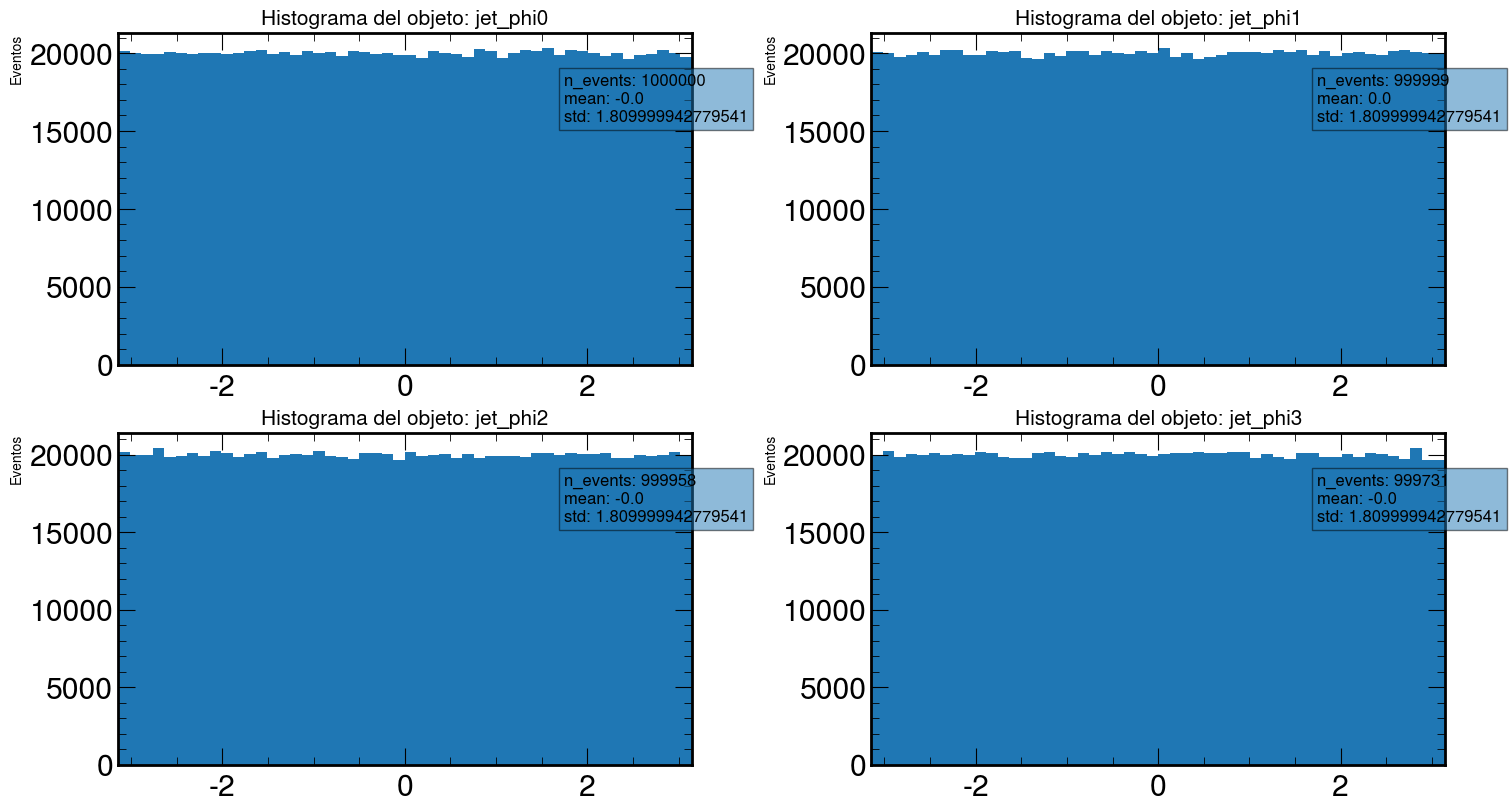

In [10]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(df_all,'jet_phi0',-np.pi,np.pi,50)
plt.subplot(2,2,2)
pt_jet(df_all,'jet_phi1',-np.pi,np.pi,50)
plt.subplot(2,2,3)
pt_jet(df_all,'jet_phi2',-np.pi,np.pi,50)
plt.subplot(2,2,4)
pt_jet(df_all,'jet_phi3',-np.pi,np.pi,50)

## Analisis para los b-jets (b1,b2) en la run_01
Eventos con 2 jets taggeados como b

In [11]:
f = df_all[["jet_btag0","jet_btag1","jet_btag2","jet_btag3"]]
f_list = [ sum(f.loc[i]) for i in range(len(f)) ]
df_all.insert(1,"n_jets",f_list)

data_filtered = df_all[df_all["n_jets"] == 2]
print("Numero de eventos con 2 jets:",len(data_filtered))
data2 = data_filtered[["jet_btag0","jet_btag1","jet_btag2","jet_btag3","n_jets","jet_pt0","jet_pt1","jet_pt2","jet_pt3",'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3']]
data2.head()

Numero de eventos con 2 jets: 221287


,jet_btag0,jet_btag1,jet_btag2,jet_btag3,n_jets,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_mass0,jet_mass1,jet_mass2,jet_mass3
4,1.0,1.0,0.0,0.0,2.0,36.721161,21.234055,10.742517,10.350548,5.551464,3.934533,1.689655e+00,2.389796e+00
5,1.0,1.0,0.0,0.0,2.0,19.959545,10.345486,5.589289,4.463228,3.100931,0.418961,8.429370e-08,1.685874e-07
6,1.0,1.0,0.0,0.0,2.0,26.365898,14.738330,10.472743,6.686828,3.832455,2.030266,1.957435e+00,8.879876e-01
7,1.0,0.0,1.0,0.0,2.0,40.243557,18.255291,4.110753,3.882720,7.717500,3.537572,5.960464e-08,1.192093e-07
8,1.0,0.0,1.0,0.0,2.0,27.317883,23.466864,15.880873,15.558229,5.371493,3.573747,2.749937e+00,2.944284e+00


In [31]:
data_filtered.to_csv("data_NonZbbbar.csv")

In [ ]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [ ]:
a = data2.shape[0]/11
steps = []
for _ in range(11):
    b = a*_
    d = a*(_+1)
    c = [int(b),int(d)]
    steps.append(c)

In [ ]:
data_bjet_dict = {"jet_pt_b1":[],"jet_pt_b2":[],
                  "jet_eta_b1":[],"jet_eta_b2":[],
                  "jet_phi_b1":[],"jet_phi_b2":[],
                  "jet_mass_b1":[],"jet_mass_b2":[]}# diccionario vacio
data_bjet = pd.DataFrame(data_bjet_dict)
data_bjet.head()

In [ ]:
for k in range(11):
    printProgressBar(k,10)
    a = steps[k][0]
    b = steps[k][1]
    tag_pt = []
    tag_eta = []
    tag_phi = []
    tag_mass = []
    print(steps[k])
    for i in range(a,b):
        pt = []
        eta = []
        phi = []
        mass = []
        printProgressBar(i,b-1)
        if data2.iloc[i][0] == 1.0: 
            pt.append(data_filtered.jet_pt0.to_list()[i])
            eta.append(data_filtered.jet_eta0.to_list()[i])
            phi.append(data_filtered.jet_phi0.to_list()[i])
            mass.append(data_filtered.jet_mass0.to_list()[i])
        if data2.iloc[i][1] == 1.0: 
            pt.append(data_filtered.jet_pt1.to_list()[i])
            eta.append(data_filtered.jet_eta1.to_list()[i])
            phi.append(data_filtered.jet_phi1.to_list()[i])
            mass.append(data_filtered.jet_mass1.to_list()[i])
        if data2.iloc[i][2] == 1.0: 
            pt.append(data_filtered.jet_pt2.to_list()[i])
            eta.append(data_filtered.jet_eta2.to_list()[i])
            phi.append(data_filtered.jet_phi2.to_list()[i])
            mass.append(data_filtered.jet_mass2.to_list()[i])
        if data2.iloc[i][3] == 1.0: 
            pt.append(data_filtered.jet_pt3.to_list()[i])
            eta.append(data_filtered.jet_eta3.to_list()[i])
            phi.append(data_filtered.jet_phi3.to_list()[i])
            mass.append(data_filtered.jet_mass3.to_list()[i])
        tag_pt.append(pt)
        tag_eta.append(eta)
        tag_phi.append(phi)
        tag_mass.append(mass)


    jet_pt_b1 = [j[0] for j in tag_pt]
    jet_pt_b2 = [j[1] for j in tag_pt]
    jet_eta_b1 = [j[0] for j in tag_eta]
    jet_eta_b2 = [j[1] for j in tag_eta]
    jet_phi_b1 = [j[0] for j in tag_phi]
    jet_phi_b2 = [j[1] for j in tag_phi]
    jet_mass_b1 = [j[0] for j in tag_mass]
    jet_mass_b2 = [j[1] for j in tag_mass]


    di = {"jet_pt_b1":jet_pt_b1,"jet_pt_b2":jet_pt_b2,
        "jet_eta_b1":jet_eta_b1,"jet_eta_b2":jet_eta_b2,
        "jet_phi_b1":jet_phi_b1,"jet_phi_b2":jet_phi_b2,
        "jet_mass_b1":jet_mass_b1,"jet_mass_b2":jet_mass_b2}

    data_bjet = pd.concat([data_bjet,pd.DataFrame(di,index=None)])
    data_bjet.to_csv("bjet.csv",index=None)
    print("se actualizo el dataset")

In [12]:
data_bjet = pd.read_csv("data_bjet_all.csv") # data extraida de la anterior celda que tarda 4 horas en correr, por lo que se implemento de forma local

In [ ]:
phi_cor = []
for i in range(len(data_bjet)):
    phi_cor.append(AbsDeltaPhi(i,data_bjet,"jet_phi_b1","jet_phi_b2"))

data_bjet['Delta_eta_b'] = data_bjet.jet_eta_b2 - data_bjet.jet_eta_b1
data_bjet['Delta_phi_b'] = phi_cor
data_bjet["DeltaR_b"] = DeltaR(data_bjet.Delta_eta_b,data_bjet.Delta_phi_b)

In [13]:
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,DeltaR_b,y1,y2,inv_mass_b,inv_mass_b_eta
0,36.721160,21.234055,-0.667921,-1.302323,-2.962479,0.711884,5.551464,3.934533e+00,-0.634402,2.608822,2.684850,-0.661352,-1.287800,56.735845,56.809364
1,19.959545,10.345486,-1.096422,1.349461,-2.607361,0.414988,3.100931,4.189606e-01,2.445883,3.022348,3.888050,-1.086912,1.348745,52.791487,53.018887
2,26.365898,14.738330,0.909281,0.433367,-0.506147,2.455689,3.832455,2.030266e+00,-0.475914,2.961836,2.999828,0.901764,0.429546,40.374603,40.392098
3,40.243557,4.110753,-1.150441,0.254797,-0.776888,2.721444,7.717500,5.960465e-08,1.405239,2.784853,3.119311,-1.135716,0.254797,31.870653,32.015528
4,27.317883,15.880873,-0.187863,-1.720375,2.797726,-0.925652,5.371493,2.749937e+00,-1.532512,2.559808,2.983490,-0.184373,-1.706533,52.985505,53.171184


## Histogramas para los pT(b1,b2)

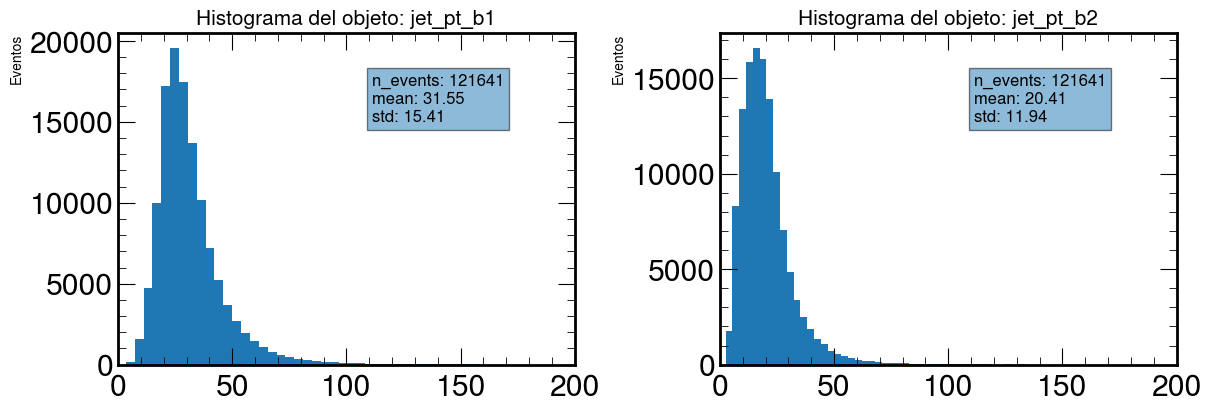

In [14]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"jet_pt_b1",0,200,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,"jet_pt_b2",0,200,100)

## Histogramas para los $\eta$(b1,b2)

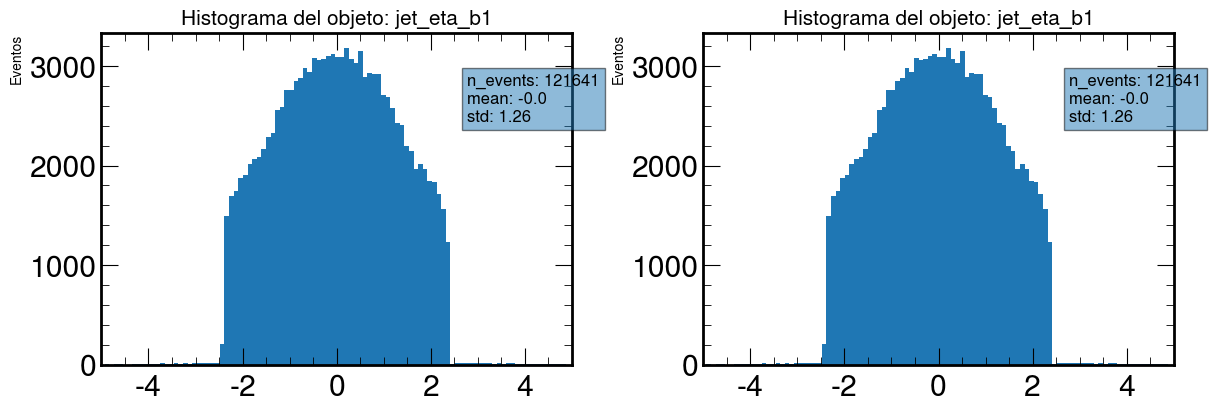

In [15]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_eta_b1',-5,5,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_eta_b1',-5,5,100)

## Histogramas para los $\phi$(b1,b2)

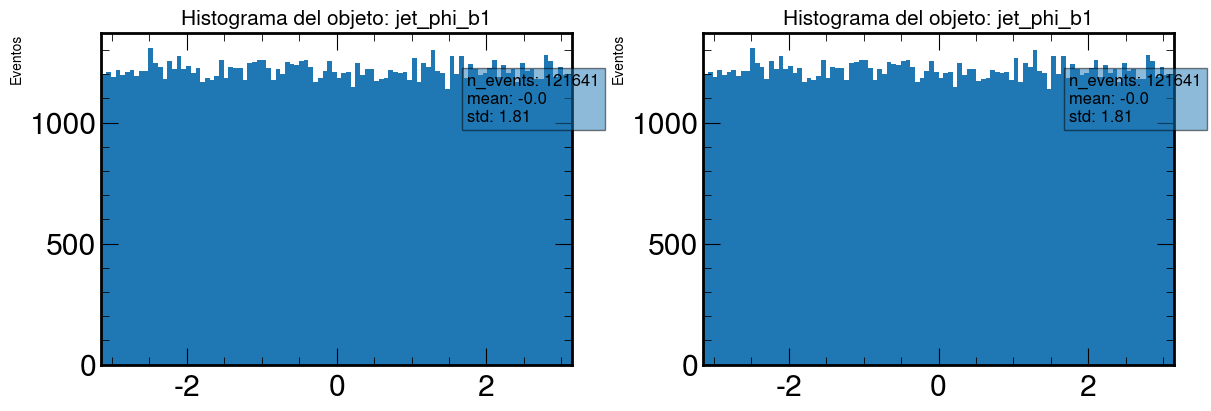

In [16]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,100)

## Histogramas para el $\Delta R$

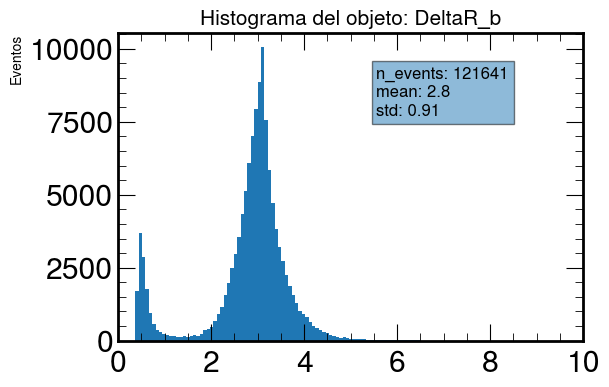

In [17]:
plt.figure(figsize=(6,4))
pt_jet(data_bjet,"DeltaR_b",0,10,100)

## Histogramas para los $\Delta \phi$, $\Delta \eta$
Notamos que el $\Delta \phi$ esta definido de 0 hasta $\pi$ y se grafica positivo debido a como esta definido el valor absoluto de esta cantidad

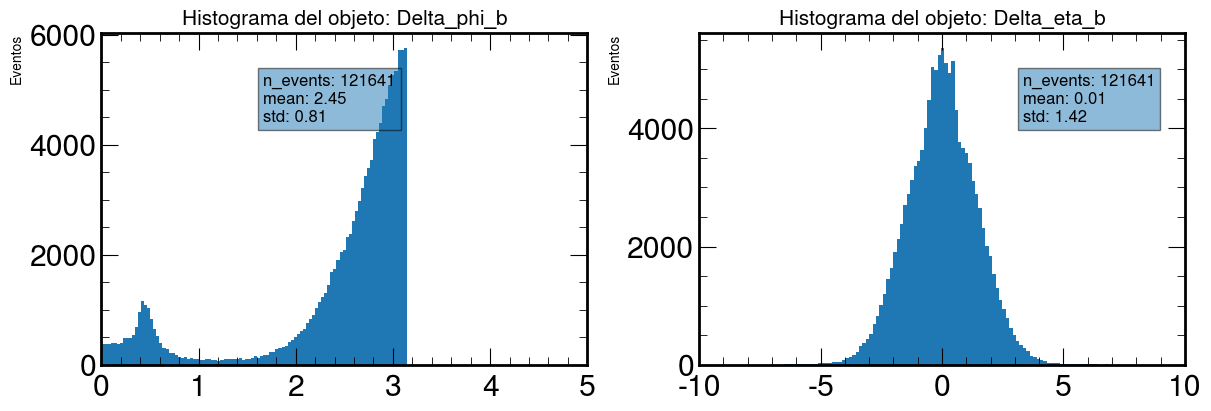

In [18]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'Delta_phi_b',0,5,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'Delta_eta_b',-10,10,100)

## Rapidez "$y$" en terminos de $\eta$
$\begin{equation}
y = ln \left ( \frac{\sqrt{m^{2} + p_{T}^{2}cosh^{2}(\eta)}+ p_{T}sinh(\eta)}{\sqrt{m^{2} + p_{T}^{2}}} \right )
\end{equation}$

referencia: [rapidez de particulas](https://hmong.es/wiki/Pseudorapidity)]

In [27]:
def y(m,eta,pt):
    return np.log( (np.sqrt(m**2 + (pt**2)*(np.cosh(eta)**2)) + pt*np.sinh(eta)) / (np.sqrt(m**2 + pt**2)) )

y1 = y(data_bjet.jet_mass_b1,data_bjet.jet_eta_b1,data_bjet.jet_pt_b1)
y2 = y(data_bjet.jet_mass_b2,data_bjet.jet_eta_b2,data_bjet.jet_pt_b2)

data_bjet['y1'] = y1
data_bjet['y2'] = y2

In [33]:
data_bjet.to_csv("data_bjet_all.csv",index=False)

## Histogramas de Rapidez $y(b1)=y1$,$y(b2)=y2$

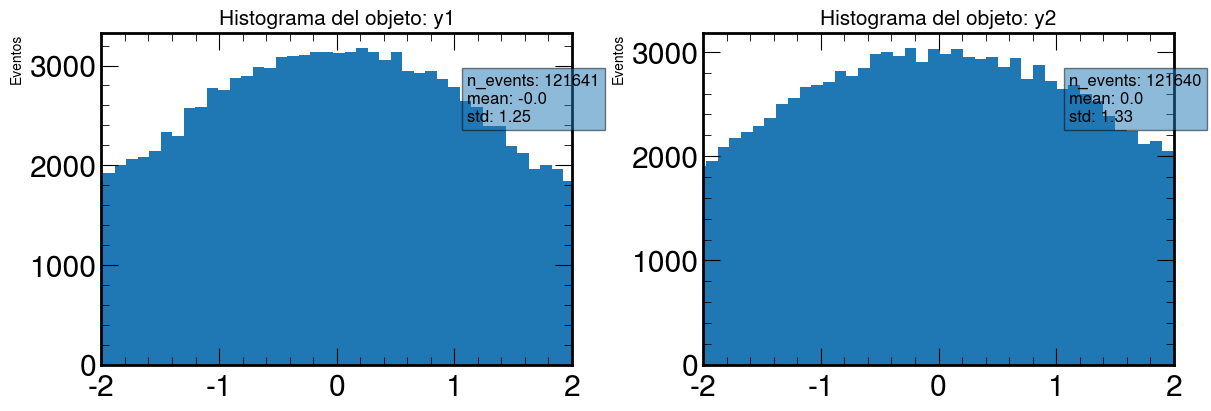

In [19]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'y1',-2,2,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'y2',-2,2,100)

## Masa invariante en Colisionadores de particulas:

$\begin{equation}
M^{2} = 2P_{T1}P_{T2}[ cosh(y_{1} - y_{2}) - cos(\phi _{1} - \phi _{2}) ]
\end{equation}$

In [29]:
def inv_mass(pt1,pt2,y1,y2,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(y1 - y2) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.y1,data_bjet.y2,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b"] = inv_m # agregamos al dataset la masa invariante.

def inv_mass(pt1,pt2,Deta,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(Deta) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.Delta_eta_b,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b_eta"] = inv_m # agregamos al dataset la masa invariante.

## Histograma para Masa invariante usando definicion de $y$ (izquierda) y usando la definicion de $\eta$ (derecha)

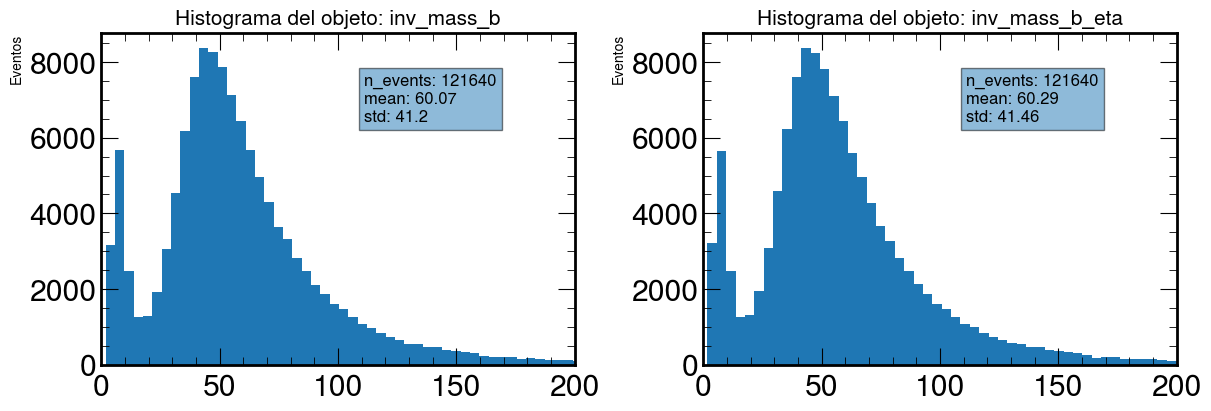

In [20]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"inv_mass_b",0,200,200)
plt.subplot(1,2,2)
pt_jet(data_bjet,"inv_mass_b_eta",0,200,200)

## MET

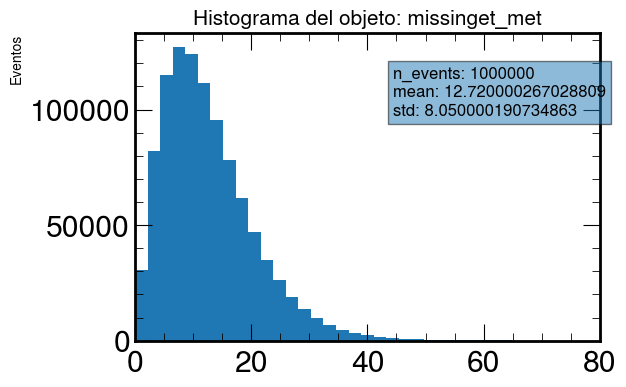

In [21]:
plt.figure(figsize=(6,4))
pt_jet(df_all,'missinget_met',0,80,200)